<a href="https://colab.research.google.com/github/Harish-topper12/Deep_Learning_Assignment/blob/main/Deep_Learning_Assignment1_Updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Import Libraries

In [1]:
# Standard Libraries
import csv
import requests

# Data Handling and Visualization Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn Libraries
from sklearn.linear_model import Perceptron
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import balanced_accuracy_score, f1_score, roc_auc_score, roc_curve

# Tensorflow and Keras Basic Modules
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.metrics import AUC

# Keras Layers, Regularizers, Optimizers, and Losses
from keras.layers import Dense, Dropout, BatchNormalization
from keras.regularizers import l1, l2, l1_l2
from keras.optimizers import Adam, RMSprop, Adagrad
from keras.losses import BinaryCrossentropy


#### Import Data from url

In [2]:
# Setting the URL to fetch the diabetes dataset
url = "https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/diabetes_scale"

# Reading the dataset from the URL into a pandas DataFrame
diabetes_data = pd.read_csv(url, sep=' ', header=None)

# Displaying the top rows of the fetched data for a quick overview
diabetes_data.head()

,0,1,2,3,4,5,6,7,8,9
0,-1,1:-0.294118,2:0.487437,3:0.180328,4:-0.292929,5:-1,6:0.00149028,7:-0.53117,8:-0.0333333,NaN
1,1,1:-0.882353,2:-0.145729,3:0.0819672,4:-0.414141,5:-1,6:-0.207153,7:-0.766866,8:-0.666667,NaN
2,-1,1:-0.0588235,2:0.839196,3:0.0491803,4:-1,5:-1,6:-0.305514,7:-0.492741,8:-0.633333,NaN
3,1,1:-0.882353,2:-0.105528,3:0.0819672,4:-0.535354,5:-0.777778,6:-0.162444,7:-0.923997,8:-1,NaN
4,-1,1:-1,2:0.376884,3:-0.344262,4:-0.292929,5:-0.602837,6:0.28465,7:0.887276,8:-0.6,NaN


#### Data Preprocessing

In [3]:
# Selecting the first 9 columns from the diabetes dataset
diabetes_data = diabetes_data.iloc[:, 0:9]

# Renaming the columns for better readability and understanding
diabetes_data.columns = [
    'Outcome',
    'Pregnancies',
    'Glucose',
    'BloodPressure',
    'SkinThickness',
    'Insulin',
    'BMI',
    'DiabetesPedigreeFunction',
    'Age'
]

In [4]:
# Iterate over all columns, excluding the first one (Outcome)
for i in diabetes_data.columns[1:]:
    # Strip the first two characters from each entry in the current column
    diabetes_data[i] = diabetes_data[i].str[2:]

# Iterate over all columns again, excluding the first one (Outcome)
for i in diabetes_data.columns[1:]:
    # Convert the data type of each entry in the current column to float
    diabetes_data[i] = diabetes_data[i].astype(float)

In [5]:
# Verifying the data after data cleaning
diabetes_data

,Outcome,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-1,-0.294118,0.487437,0.180328,-0.292929,-1.000000,0.001490,-0.531170,-0.033333
1,1,-0.882353,-0.145729,0.081967,-0.414141,-1.000000,-0.207153,-0.766866,-0.666667
2,-1,-0.058824,0.839196,0.049180,-1.000000,-1.000000,-0.305514,-0.492741,-0.633333
3,1,-0.882353,-0.105528,0.081967,-0.535354,-0.777778,-0.162444,-0.923997,-1.000000
4,-1,-1.000000,0.376884,-0.344262,-0.292929,-0.602837,0.284650,0.887276,-0.600000
...,...,...,...,...,...,...,...,...,...
763,1,0.176471,0.015075,0.245902,-0.030303,-0.574468,-0.019374,-0.920581,0.400000
764,1,-0.764706,0.226131,0.147541,-0.454545,-1.000000,0.096870,-0.776260,-0.800000
765,1,-0.411765,0.216080,0.180328,-0.535354,-0.735225,-0.219076,-0.857387,-0.700000
766,-1,-0.882353,0.266332,-0.016393,-1.000000,-1.000000,-0.102832,-0.768574,-0.133333


In [6]:
# Concise summary of diabetes_data
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Outcome                   768 non-null    int64  
 1   Pregnancies               768 non-null    float64
 2   Glucose                   768 non-null    float64
 3   BloodPressure             768 non-null    float64
 4   SkinThickness             768 non-null    float64
 5   Insulin                   768 non-null    float64
 6   BMI                       768 non-null    float64
 7   DiabetesPedigreeFunction  768 non-null    float64
 8   Age                       759 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 54.1 KB


In [7]:
# Remove rows in the diabetes_data dataframe where the 'Age' column has missing (NaN) values.
# The 'inplace=True' argument modifies the original dataframe without returning a new one.
diabetes_data.dropna(subset=['Age'], inplace=True)

##### Observation:
Age has 9 missing values so we decide to remove these 9 null values as it's a small proportion in the total dataset.

In [8]:
# Replace -1 with 0 for easy understanding which represents patients with no diabetes
diabetes_data['Outcome'] = diabetes_data['Outcome'].replace({-1: 0})

#### Split Data

In [9]:
from sklearn.model_selection import train_test_split

# Splitting the data into a training set (bigtrain_set) and a test set.
# - test_size = 0.2 reserves 20% of the data for the test set.
# - stratify = diabetes_data['Outcome'] ensures that the same proportion of outcomes is preserved in both train and test sets.
# - random_state = 0 is used for reproducibility of the exact same train/test split.
bigtrain_set, test_set = train_test_split(diabetes_data, test_size=0.2, stratify=diabetes_data['Outcome'], random_state=0)

# Extracting the features (X) and target variable (y) from the bigtrain_set.
X_train = bigtrain_set.drop('Outcome', axis=1)
y_train = bigtrain_set['Outcome']

# Extracting the features (X) and target variable (y) from the test_set. This will be used for model evaluation later.
X_test = test_set.drop('Outcome', axis=1)
y_test = test_set['Outcome']

##### Reason for Data Splitting before doing EDA:
Splitting a dataset before EDA helps to prevent data leakage, ensuring that insights and decisions made during EDA do not unintentionally bias the midelling process by using knowledge from the test set.

##### Summary of Dataset Split: Number of Samples and Label Distribution

In [10]:
# Display the number of samples in each dataset
print("Number of samples in training set:", X_train.shape[0])
#print("Number of samples in validation set:", X_val.shape[0])
print("Number of samples in test set:", X_test.shape[0])
print()

# Display the distribution of labels in each dataset
print("Label distribution in training set:\n", y_train.value_counts(normalize=True).round(3))
print()
# print("Label distribution in validation set:\n", y_val.value_counts(normalize=True).round(3))
# print()
print("Label distribution in test set:\n", y_test.value_counts(normalize=True).round(3))

Number of samples in training set: 607
Number of samples in test set: 152

Label distribution in training set:
 1    0.654
0    0.346
Name: Outcome, dtype: float64

Label distribution in test set:
 1    0.651
0    0.349
Name: Outcome, dtype: float64


##### Observations:

As dataset is imbalanced so we consider balanced accuracy instead of accuracy.


#### Exploratory Data Analysis(EDA)

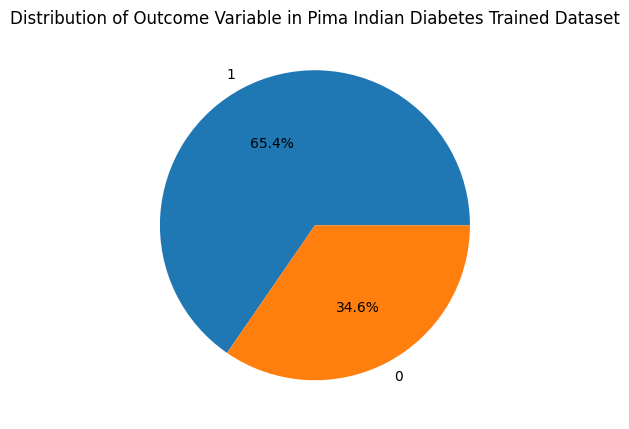

In [11]:
import matplotlib.pyplot as plt

# Extract the frequency counts for the 'Outcome' column in the training set
outcome_counts = y_train.value_counts()

# Initialize a plot of specified size
plt.figure(figsize=(5, 7))

# Create a pie chart of the outcome distribution with percentage labels
outcome_counts.plot.pie(autopct="%.1f%%")

# Set the title for the pie chart
plt.title('Distribution of Outcome Variable in Pima Indian Diabetes Trained Dataset')

# Remove the redundant y-label, as the information is implicit in a pie chart
plt.ylabel('')

# Display the pie chart
plt.show()


##### Distribution of Features in the Pima Indians Diabetes Dataset

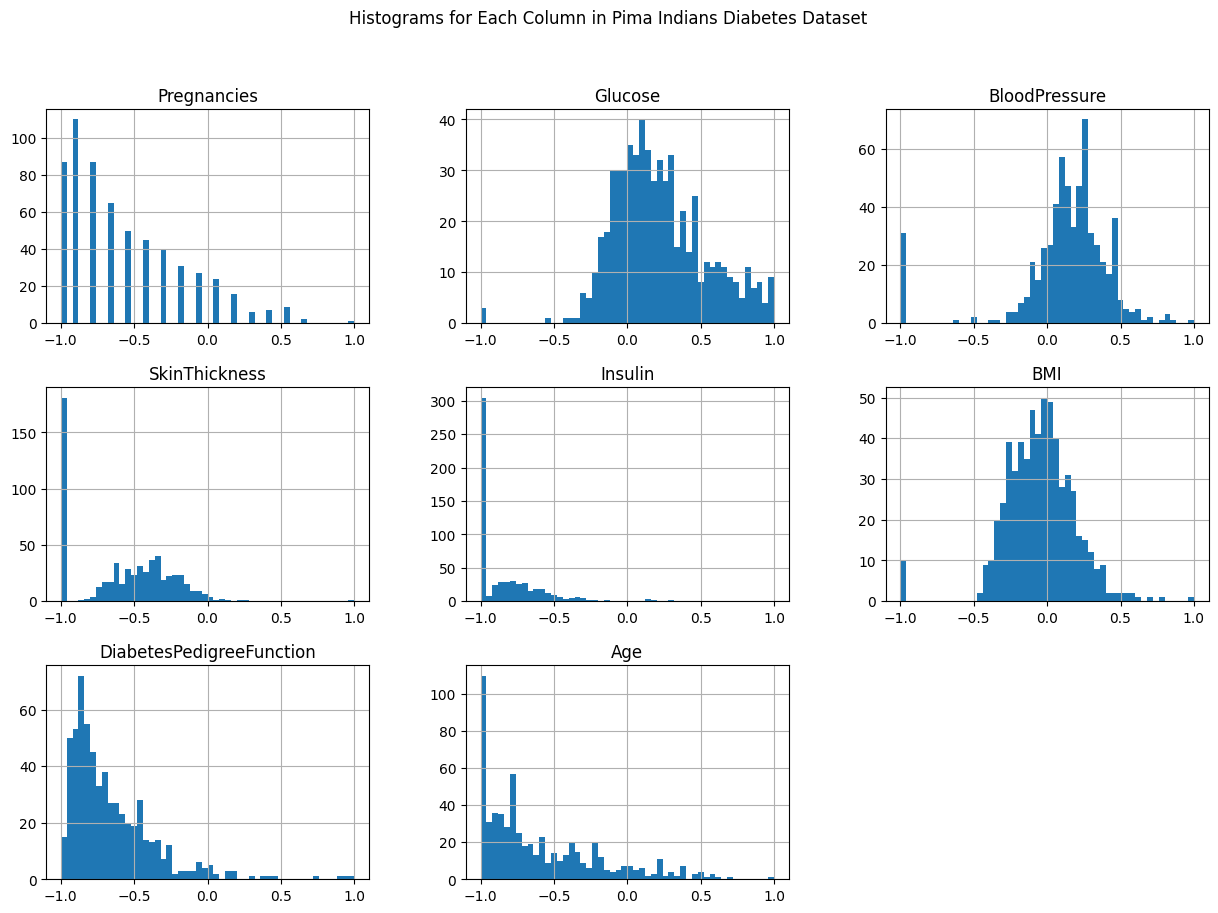

In [12]:
X_train.hist(figsize=(15, 10), bins=50)
plt.suptitle("Histograms for Each Column in Pima Indians Diabetes Dataset")
plt.show()

##### Observations:
1. Age and DiabetesPedigreeFunction exhibit right-skewed distributions based on histogram analysis.

2. Blood pressure and BMI have outliers with values of -1, with 30 instances of outliers in Blood pressure and 10 in BMI.

3. Glucose has outliers with values of -1, affecting 5 data points.

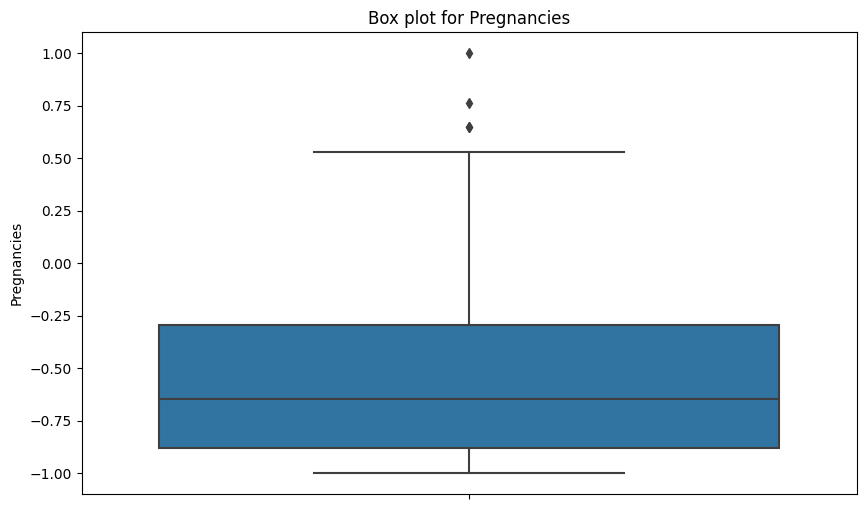

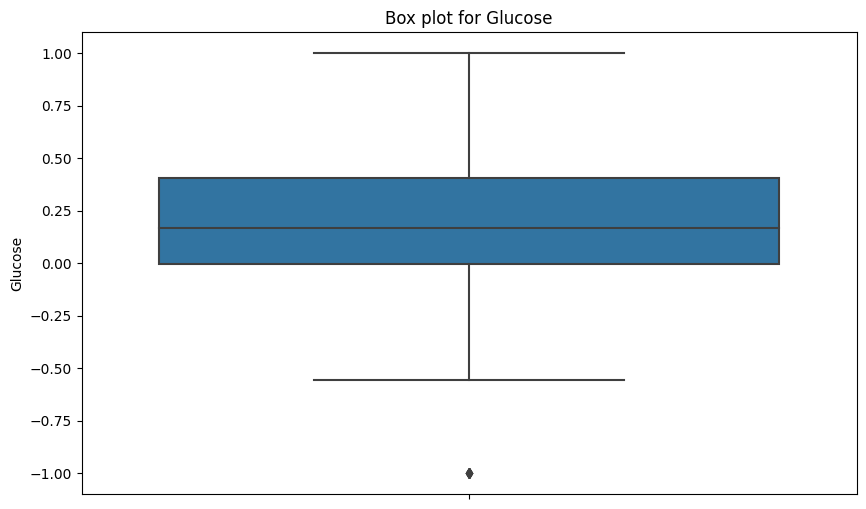

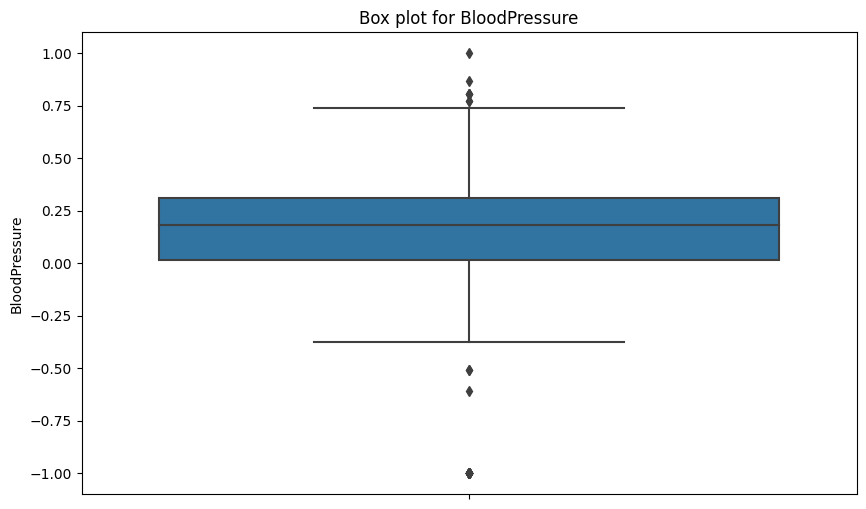

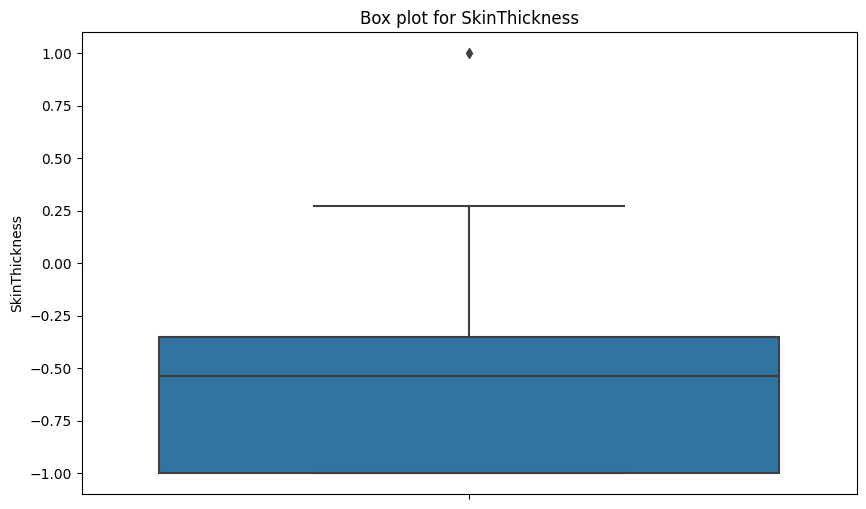

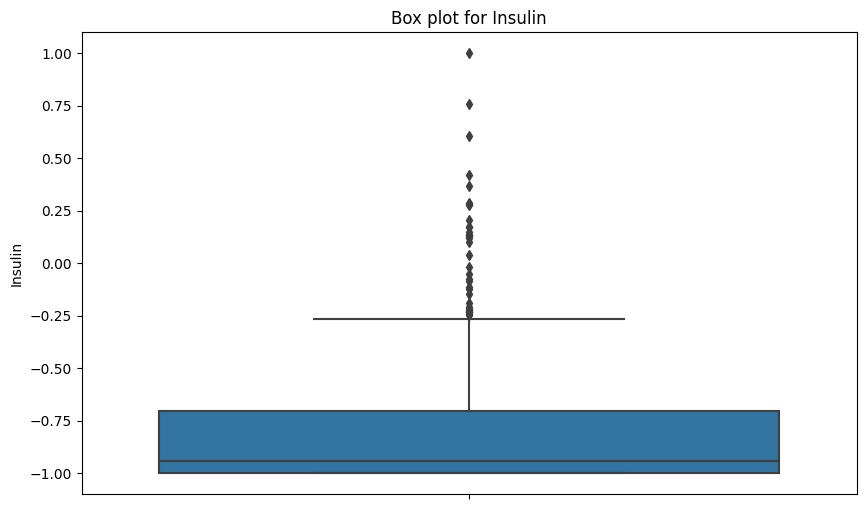

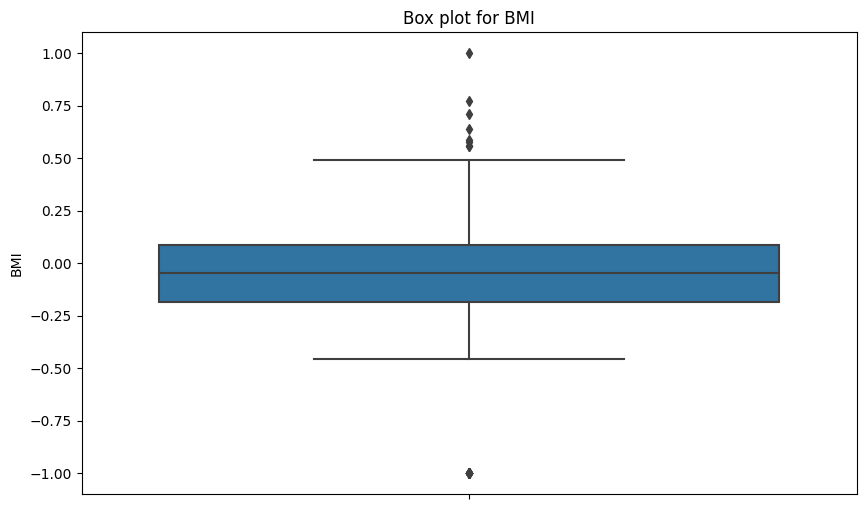

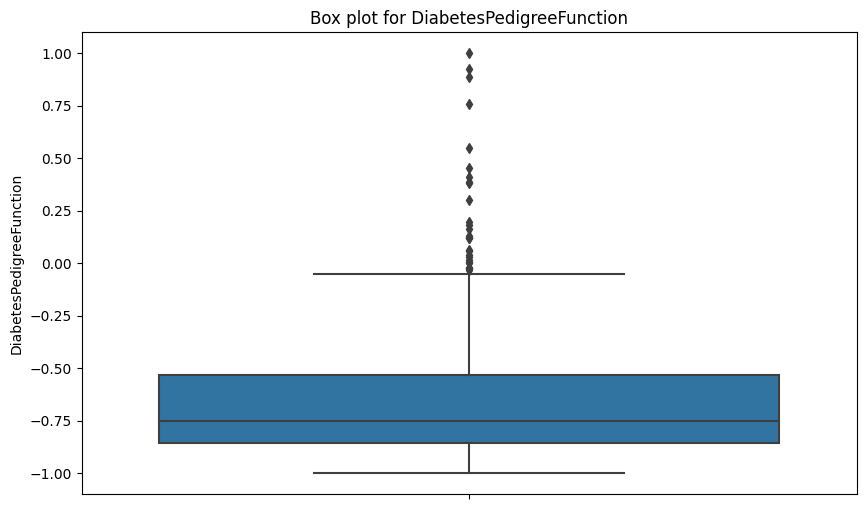

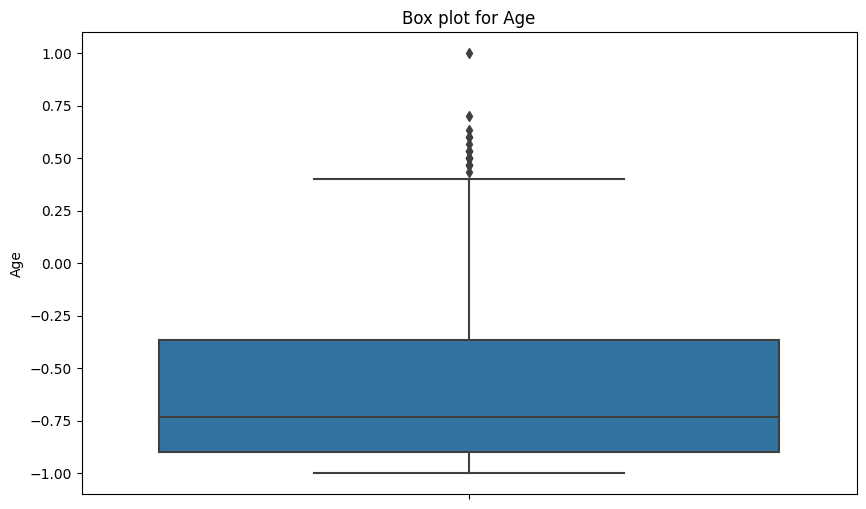

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Loop through each column in the dataframe
for column in diabetes_data.columns[1:]:

    # Initialize a new figure for each column
    plt.figure(figsize=(10, 6))

    # Create a box plot for the current column
    sns.boxplot(y=diabetes_data[column])

    # Set title for the plot
    plt.title(f'Box plot for {column}')

    # Display the plot
    plt.show()

#### Observations:
Outliers that we have guessed from the histogram are confirmed. Although, there are other outliers we are not removing them since removing those outliers impacts the training and test accuracy.

##### Approaches based on Box-plot and Histogram:
1. BMI, Glucose has outlier at -1 and of 5-10 values so we replace those with either median values or remove rows but I am replacing with median values.



In [14]:
cols_to_replace_median = ['BMI', 'Glucose', 'BloodPressure']

for col in cols_to_replace_median:
    median = X_train[col][X_train[col] != -1].median()  # Calculate median excluding -1 values
    X_train[col] = X_train[col].replace(-1, median)

In [15]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 607 entries, 164 to 126
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               607 non-null    float64
 1   Glucose                   607 non-null    float64
 2   BloodPressure             607 non-null    float64
 3   SkinThickness             607 non-null    float64
 4   Insulin                   607 non-null    float64
 5   BMI                       607 non-null    float64
 6   DiabetesPedigreeFunction  607 non-null    float64
 7   Age                       607 non-null    float64
dtypes: float64(8)
memory usage: 42.7 KB


#### Ranking Features by Correlation with Diabetes Outcome in PIMA Dataset

In [16]:
# Combine the features and target to create a temporary training dataset
temp_train_data = X_train.copy()
temp_train_data['Outcome'] = y_train

# Calculate the correlation matrix
correlation_matrix = temp_train_data.corr()

# Extract correlations with the 'Outcome' column and sort them
correlations_with_target = correlation_matrix['Outcome'].sort_values(ascending=False)

# Print a message to indicate the purpose of the following output
print("Correlation of Features with the 'Outcome' Variable in PIMA Dataset:")
print("----------------------------------------------------------------------")
print(correlations_with_target)

Correlation of Features with the 'Outcome' Variable in PIMA Dataset:
----------------------------------------------------------------------
Outcome                     1.000000
SkinThickness              -0.047106
Insulin                    -0.119558
BloodPressure              -0.150071
DiabetesPedigreeFunction   -0.168979
Pregnancies                -0.246734
Age                        -0.270593
BMI                        -0.276801
Glucose                    -0.501839
Name: Outcome, dtype: float64


#### Function to calculate Metrics

In [17]:
def evaluate_model(model_name, model, X, y, dataset_name="Test"):
    """
    Evaluates a trained model using test data and displays metrics.

    Parameters:
    - model_name: Name/identifier of the model being used
    - model: Trained model
    - X, y: Data and labels
    - dataset_name: Name of the dataset being evaluated (default is "Test")

    Returns:
    - Dictionary of Balanced Accuracy, F1 Score, AUC, and ROC Curve Data
    """
    # Predictions
    y_pred = model.predict(X)

    if model_name == 'Baseline Perceptron' or model_name == 'Optimized Perceptron':
        y_pred_prob = model.decision_function(X)
    else:
        y_pred_prob = model.predict_proba(X)[:, 1]  # get the probability of the positive class

    # Compute metrics
    b_accuracy = balanced_accuracy_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    auc = roc_auc_score(y, y_pred_prob)

    # Get ROC Curve data
    fpr, tpr, thresholds = roc_curve(y, y_pred_prob)

    print(f"{model_name} Metrics for {dataset_name} data:")
    print(f"Balanced Accuracy: {b_accuracy:.2f}")
    print(f"f1_score: {f1:.2f}")
    print(f"AUC: {auc:.2f}")

    # Return metrics and ROC Curve data in dictionary
    return {
        "Balanced Accuracy": "{:.2f}".format(b_accuracy),
        "f1_score": "{:.2f}".format(f1),
        "AUC": "{:.2f}".format(auc),
    }


#### Baseline Perceptron

In [18]:
# Create a Perceptron instance
ppn = Perceptron()

# Fit the Perceptron to your training data
ppn.fit(X_train, y_train)

Perceptron()

#### Training Metric Evaluation for Baseline Perceptron:

In [19]:
# Evaluate the Baseline Perceptron model on the training data
ppn_train_metrics = evaluate_model('Baseline Perceptron', ppn, X_train, y_train, dataset_name="Train")

# Display the evaluation metrics for the training data
ppn_train_metrics

Baseline Perceptron Metrics for Train data:
Balanced Accuracy: 0.73
f1_score: 0.84
AUC: 0.83


{'Balanced Accuracy': '0.73', 'f1_score': '0.84', 'AUC': '0.83'}

#### Test Metric Evaluation for Baseline Perceptron:

In [20]:
# Evaluate the Baseline Perceptron model on the test data
ppn_test_metrics = evaluate_model('Baseline Perceptron', ppn, X_test, y_test, dataset_name="Test")

# Display the evaluation metrics for the test data
ppn_test_metrics

Baseline Perceptron Metrics for Test data:
Balanced Accuracy: 0.68
f1_score: 0.81
AUC: 0.80


{'Balanced Accuracy': '0.68', 'f1_score': '0.81', 'AUC': '0.80'}

#### Hyperparameter Optimization for Perceptron Using Grid Search

In [21]:
from sklearn.linear_model import Perceptron
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import balanced_accuracy_score, f1_score

# Define the parameter grid (similar to the one you provided)
param_grid = {
    'alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1],
    'max_iter': [1000, 3000, 5000, 7000, 10000, 15000],
    'early_stopping': [True, False],
    'penalty': [None, 'l1', 'l2', 'elasticnet'],
    'tol': [1e-3, 1e-4, 1e-5],
    'random_state': [0]
}

# Initialize Perceptron
ppn = Perceptron()

# Use GridSearchCV
grid_search = GridSearchCV(ppn, param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train, y_train)

# Extract the best estimator and parameters
best_ppn = grid_search.best_estimator_
best_params = grid_search.best_params_

print("Best Parameters:")
print(best_params)


Fitting 5 folds for each of 720 candidates, totalling 3600 fits
Best Parameters:
{'alpha': 0.0001, 'early_stopping': True, 'max_iter': 1000, 'penalty': 'l2', 'random_state': 0, 'tol': 0.001}


#### Optimized Perceptron Hyper parameters Explanation

    Alpha (Learning Rate):
        Alpha: It controls the step size during training, especially in optimization algorithms like stochastic gradient descent (SGD).
        Alpha=0.0001 implies that during each iteration of training, the model updates its parameters by taking a very small step in the direction that minimizes the loss function. Smaller values like this can lead to slower but more precise convergence.

    Early Stopping:
        Early_stopping: This is a regularization technique used during training. If set to True, as it is in this case, training will stop early if no improvement is observed on a validation set for a specified number of iterations.
        Early stopping helps prevent overfitting. If the model's performance on a validation set stops improving, it's an indicator that further training may lead to overfitting, so training is halted.

    Max Iterations (Maximum Iterations):
        Max_iter: It defines the maximum number of iterations for the training algorithm to converge.
        Max_iter=1000 means that the algorithm will iterate up to 1000 times, adjusting the model's parameters to minimize the loss function. This parameter helps prevent the training process from running indefinitely.

    Penalty (Regularization Term):
        Penalty: In this context, it refers to the type of regularization to apply during training. When set to 'l2', as in penalty='l2', it indicates Ridge regularization.
        Ridge regularization adds a penalty term to the loss function that discourages large values in the model's weights. This helps prevent overfitting by reducing the complexity of the model.

    Random State:
        Random_state: It is used to control the random number generation used in various parts of the model's training process.
        Random_state=0 ensures that the random operations, such as weight initialization, are reproducible. Setting it to a specific value allows you to obtain the same results in multiple runs, which is important for debugging and research.

    Tolerance (Tol):
        Tol: It serves as a stopping criterion during training. Training halts if the improvement in the loss is less than the specified tolerance for a certain number of iterations.
        Tol=0.001 indicates that training will stop if the loss function doesn't improve by at least 0.001 for a set number of iterations. Smaller tolerance values make the model more sensitive to smaller improvements.

In [22]:
best_ppn

Perceptron(early_stopping=True, penalty='l2')

#### Training Metric Evaluation for optimized Perceptron:

In [23]:
# Evaluate the optimized Perceptron model on the training data
best_ppn_train_metrics = evaluate_model('Optimized Perceptron',  # Model name or description
                                        best_ppn,                 # Optimized Perceptron model object
                                        X_train,                 # Training data features
                                        y_train,                 # True labels of the training data
                                        dataset_name="Train")    # Specify that the dataset being used is the training set

# Display the training metrics of the optimized Perceptron model
best_ppn_train_metrics

Optimized Perceptron Metrics for Train data:
Balanced Accuracy: 0.75
f1_score: 0.77
AUC: 0.84


{'Balanced Accuracy': '0.75', 'f1_score': '0.77', 'AUC': '0.84'}

#### Test Metric Evaluation for Optimized Perceptron:

In [24]:
# Evaluate the Optimized Perceptron model on the test data
best_ppn_test_metrics = evaluate_model('Optimized Perceptron', best_ppn, X_test, y_test, dataset_name="Test")

# Display the evaluation metrics for the test data
best_ppn_test_metrics

Optimized Perceptron Metrics for Test data:
Balanced Accuracy: 0.72
f1_score: 0.77
AUC: 0.81


{'Balanced Accuracy': '0.72', 'f1_score': '0.77', 'AUC': '0.81'}

#### Training a Multi-Layer Perceptron Classifier with Specified Hyperparameters

In [25]:
from sklearn.neural_network import MLPClassifier

# Initialize the MLPClassifier with specified hyperparameters
mlp_clf = MLPClassifier(
    solver="adam",          # Optimizer to use for weight optimization
    max_iter=10000,          # Maximum number of iterations for the solver to converge
    activation="relu",      # Activation function for the hidden layer
    hidden_layer_sizes=(6,6), # Number of neurons in the hidden layer
    alpha=0.01,             # Regularization parameter
    batch_size=64,          # Size of minibatches for stochastic solvers
    learning_rate_init=0.001, # Initial learning rate for weight optimization
    random_state=2,         # Random seed for reproducibility
)

# Train the MLPClassifier on the training data
mlp_clf.fit(X_train, y_train.values.ravel())

MLPClassifier(alpha=0.01, batch_size=64, hidden_layer_sizes=(6, 6),
              max_iter=10000, random_state=2)

#### MLP Best Parameters Explanation

    Alpha (Learning Rate):
        Alpha is a hyperparameter that controls the step size during the training of a machine learning model, particularly in gradient-based optimization algorithms like stochastic gradient descent (SGD).
        In this context, alpha=0.01 means that during each iteration of training, the model updates its parameters (weights and biases) by taking a step in the direction that minimizes the loss function, and the size of that step is 0.01 times the gradient of the loss with respect to the parameters.
        A smaller alpha value implies smaller steps, potentially leading to more precise convergence, but it might also increase the training time.

    Batch Size:
        Batch size determines the number of data samples that are used in each iteration of the training process.
        A batch_size=64 means that, during training, the model updates its parameters using 64 data samples at a time. This is a common practice in mini-batch gradient descent, which is often used for training neural networks.
        Smaller batch sizes provide a kind of regularization effect and may lead to lower generalization error, but they can also make training slower due to more frequent parameter updates.

    Hidden Layer Sizes:
        In the context of a neural network, like the Multi-Layer Perceptron (MLP), hidden_layer_sizes=(6, 6) specifies the architecture of the hidden layers.
        The numbers within the tuple represent the number of neurons (also known as units or nodes) in each hidden layer. In this case, there are two hidden layers, each containing 6 neurons.
        The hidden layers are responsible for learning and representing complex patterns in the data. The specific choice of the number of neurons can significantly impact the model's capacity to learn and its generalization ability.

    Max Iterations (Maximum Iterations):
        Max_iter=10000 specifies the maximum number of iterations or passes through the training data that the model should perform during training.
        It acts as a stopping criterion. If the model doesn't converge (i.e., reach a stable solution) within these maximum iterations, training will stop, even if the model hasn't fully learned the underlying patterns in the data.
        Setting a high value, like 10000, allows the model more opportunities to learn, but it also comes with the risk of overfitting if not balanced with other regularization techniques.

    Random State:
        Random_state=2 is used to control the randomness or seed the random number generator used during various parts of the model training.
        In machine learning, many operations involve randomness, such as weight initialization or data shuffling. By setting the random state to a specific value (e.g., 2), you ensure that these random operations are reproducible.
        Reproducibility is essential for research and debugging, as it allows you to recreate the same results in multiple runs.

#### Training Metric Evaluation for MLP:

In [26]:
mlp_train_metrics = evaluate_model('MLP', mlp_clf, X_train, y_train, dataset_name="Train")
mlp_train_metrics

MLP Metrics for Train data:
Balanced Accuracy: 0.76
f1_score: 0.85
AUC: 0.87


{'Balanced Accuracy': '0.76', 'f1_score': '0.85', 'AUC': '0.87'}

#### Test Metric Evaluation for MLP:

In [27]:
mlp_test_metrics = evaluate_model('MLP', mlp_clf, X_test, y_test, dataset_name="Test")
mlp_test_metrics

MLP Metrics for Test data:
Balanced Accuracy: 0.78
f1_score: 0.86
AUC: 0.84


{'Balanced Accuracy': '0.78', 'f1_score': '0.86', 'AUC': '0.84'}

In [28]:
# Organizing the collected metrics for each model in a structured format
metrics_data = {
    # Defining the metrics names for better clarity in the table
    'Metric': ['Balanced Accuracy (Train)', 'Balanced Accuracy (Test)',
               'F1 Score (Train)', 'F1 Score (Test)',
               'AUC (Train)', 'AUC (Test)'],

    # Metrics values for the Baseline Perceptron model
    'Baseline Perceptron': [ppn_train_metrics['Balanced Accuracy'], ppn_test_metrics['Balanced Accuracy'],
                            ppn_train_metrics['f1_score'], ppn_test_metrics['f1_score'],
                            ppn_train_metrics['AUC'], ppn_test_metrics['AUC']],

    # Metrics values for the Optimized Perceptron model
    'Optimized Perceptron': [best_ppn_train_metrics['Balanced Accuracy'], best_ppn_test_metrics['Balanced Accuracy'],
                             best_ppn_train_metrics['f1_score'], best_ppn_test_metrics['f1_score'],
                             best_ppn_train_metrics['AUC'], best_ppn_test_metrics['AUC']],

    # Metrics values for the MLP model
    'MLP': [mlp_train_metrics['Balanced Accuracy'], mlp_test_metrics['Balanced Accuracy'],
            mlp_train_metrics['f1_score'], mlp_test_metrics['f1_score'],
            mlp_train_metrics['AUC'], mlp_test_metrics['AUC']]
}

# Create a DataFrame from the metrics data for easy visualization and comparison
metrics_table = pd.DataFrame(metrics_data)

# Setting the 'Metric' column as the index for better representation in the table
metrics_table = metrics_table.set_index('Metric')

# Display the formatted metrics table
metrics_table


,Baseline Perceptron,Optimized Perceptron,MLP
Metric,,,
Balanced Accuracy (Train),0.73,0.75,0.76
Balanced Accuracy (Test),0.68,0.72,0.78
F1 Score (Train),0.84,0.77,0.85
F1 Score (Test),0.81,0.77,0.86
AUC (Train),0.83,0.84,0.87
AUC (Test),0.80,0.81,0.84
